# Численные методы

## Лабораторная работа 1

### Вариант 11
### Студент: Тимофеенко Никита

#### Задание 1.

In [1]:
import numpy as np

a_poly_ratio = [1, 5, -40, -20, 144]
a_roots = np.roots(a_poly_ratio)
print(a_roots)


b_poly_ratio = [1, 1, 9, 11, -22]
b_roots = np.roots(b_poly_ratio)
print(b_roots)


v_poly_ratio = [3, -8, 1, 0, 5]
v_roots = np.roots(v_poly_ratio)
print(v_roots)

-9.000000000000014
[-3.20550457e-16+3.31662479j -3.20550457e-16-3.31662479j
 -2.00000000e+00+0.j          1.00000000e+00+0.j        ]
[ 2.40910026+0.j          1.09578905+0.j         -0.41911133+0.67504885j
 -0.41911133-0.67504885j]


#### Задание 2.

In [18]:
from scipy.linalg import solve
import numpy as np


A1 = np.array([[1, 2, -1],
               [1, 1, 1],
               [1, -3, -2]])

b1 = np.array([4, 12, -22]).reshape((3, 1))
x1 = solve(A1, b1)
print(f'Ответ первой системы: x = {x1[0][0]} y = {x1[1][0]} z = {x1[2][0]}')

A2 = np.array([[-1, 2, 8],
               [1, -1, 7],
               [1, 4, -1]])

b2 = np.array([5, 9, -12]).reshape((3, 1))
x2 = solve(A2, b2)
print(f'Ответ второй системы: x = {x2[0][0]} y = {x2[1][0]} z = {x2[2][0]}')



Ответ первой системы: x = 2.0 y = 4.0 z = 6.0
Ответ второй системы: x = -1.120481927710844 y = -2.4457831325301203 z = 1.0963855421686746


#### Задание 3.

Приближенное решение с использованием начального приближения x0 = 0.5: 0.636732650805282


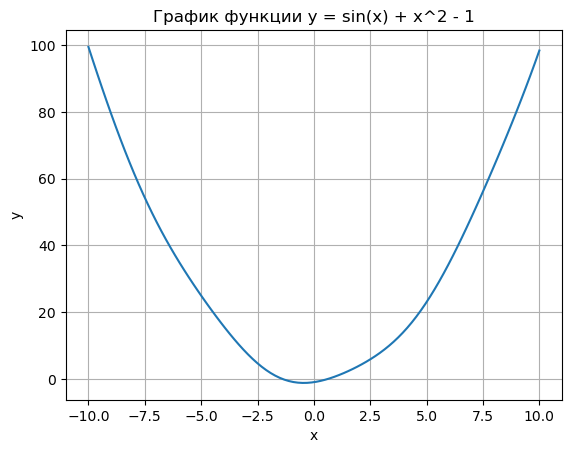

In [34]:
from scipy.optimize import root
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    """ Определяем нашу функцию, перенесем все налево """
    return np.sin(x) + x ** 2 - 1

x0 = 0.5
solution = root(f, x0)
print(f'Приближенное решение с использованием начального приближения x0 = 0.5: {solution.x[0]}')

x = np.linspace(-10, 10, 100)
y = f(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')

plt.title('График функции y = sin(x) + x^2 - 1')
plt.grid()
plt.show()

In [14]:
from scipy.optimize import root_scalar
import numpy as np



def f(x):
	""" Определяем нашу функцию, перенесем все налево """
	return np.sin(x) + x ** 2 - 1


solution = root_scalar(f, method='brentq', bracket=[0, 5])
print(f'Приближенное решение с использованием ограничения от 0 до 5: {solution.root},\nколичество итераций: {solution.iterations}')

Приближенное решение с использованием ограничения от 0 до 5: 0.636732650805281,
количество итераций: 9


#### Задание 4.

##### Решить систему уравнений методом Ньютона.

##### Вариант 1.

In [17]:
import numpy as np

def f(x):
	""" Начальная функция """
	return np.array([np.sin(x[0] + 1) - x[1] - 1.2,
					 2 * x[0] + np.cos(x[1]) - 2])



def df(x):
	""" Производные начальной функции """
	return np.array([[np.cos(x[0] + 1), -1],
					 [2, -np.sin(x[1])]])

# Начальное приближение
x0 = np.array([0, 0])

# Параметры метода Ньютона
tol = 1e-6						# допустимая точность
maxiter = 100
iter = 0
dx = np.ones_like(x0)			# приращение

# Итерационный процесс метода Ньютона
while np.linalg.norm(dx) > tol and iter < maxiter:
	dx = np.linalg.solve(df(x0), -f(x0))			# приращение на текущей итерации
	x0 = x0 + dx									# добавляем приращение
	iter += 1

# Выводим результат
print(f'x = {x0[0]} y = {x0[1]} \nколичество итераций: {iter}')

x = 0.51015015745074 y = -0.20183841535657407 
количество итераций: 5


#### Задание 5.

количество итераций: 5, x = 0.510150350643593,  y = -0.20184084814209885


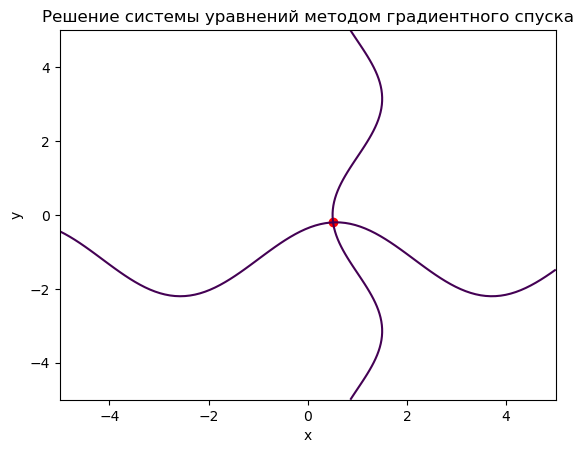

In [23]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt


def fun(x):
	""" Вычисление значений левой и правой частей системы уравнений на заданных значениях переменных x и y.  """
	f = np.zeros(2)							# создание массива f с двумя элементами, заполненными нулями. Этот массив будет содержать значения левой и правой частей системы уравнений.
	f[0] = np.sin(x[0]+1) - x[1] - 1.2
	f[1] = 2 * x[0] + np.cos(x[1]) - 2
	return f

def lsq(x):
	""" Используется для оптимизации системы уравнений методом градиентного спуска """
	return np.sum(fun(x) ** 2)

x0 = np.array([0, 0]) 						# начальное приближение
result = minimize(lsq, x0, method='CG') 	# решение методом градиентного спуска

print(f'количество итераций: {result.nit}, x = {result.x[0]},  y = {result.x[1]}')

def f1(x, y):
	return np.sin(x + 1) - y - 1.2

def f2(x, y):
	return 2 * x + np.cos(y) - 2

# Создаем сетку значений переменных x и y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Вычисляем значения функций на сетке
Z1 = f1(X, Y)
Z2 = f2(X, Y)

# Строим графики функций
fig, ax = plt.subplots()
ax.contour(X, Y, Z1, levels=[0])
ax.contour(X, Y, Z2, levels=[0])

# Добавляем точку оптимального решения
ax.scatter(result.x[0],result.x[1], c='red')

# Добавляем подписи осей и заголовок
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Решение системы уравнений методом градиентного спуска')

plt.show()


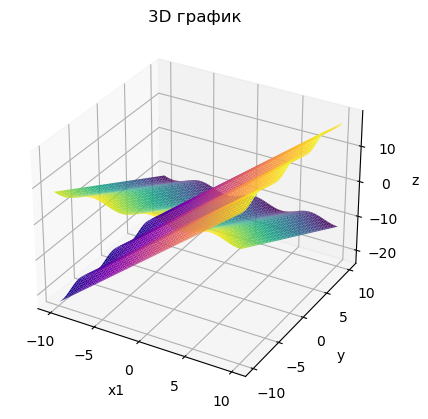

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f1(x1, y):
	return np.sin(x1 + 1) - y - 1.2

def f2(x1, y):
	return  2 * x1 + np.cos(y) - 2

x1_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
x1, y = np.meshgrid(x1_vals, y_vals)

z1 = f1(x1, y)
z2 = f2(x1, y)

figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
ax.plot_surface(x1, y, z1, cmap='viridis')
ax.plot_surface(x1, y, z2, cmap='plasma')

ax.set_xlabel('x1')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('3D график')

ax.mouse_init()

plt.show()

#### Задание 6.

In [11]:
import numpy as np
from scipy.optimize import fsolve

def eq(vars):
	x, y = vars
	eq1 = np.sin(x + 1) - y - 1.2
	eq2 = 2 * x + np.cos(y) - 2
	return [eq1, eq2]

x0 = [0, 0]

result = fsolve(eq, x0)
print(f'x = {result[0]} y = {result[1]}')

x = 0.5101501574506685 y = -0.20183841535647531
